# Demo

Demo to assess the performance of XRNN for training and testing window (for a given well). I.E. the XRNN has seen only data from the training period for that particular well. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

import dataloader
import util
import xrnn
import plotter

Using TensorFlow backend.


In [2]:
#load formatted data
n_lag = 3
n_seq = 6
ref_case = 6       #out of n_samples
n_samples = 300

Bakken = dataloader.DataLoader(n_samples, n_lag, n_seq, verbose=False)
Bakken.load_data(flip=False)

#train and test refers to the same well. 
#for x-rnn, we need to further split it to train (some wells) and test (some other wells)
x_train, x_test, y_train, y_test = Bakken.get_time_series_xrnn(split=0.40)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#qc time windows (comment if n_samples is > 10)
#util.qc_timeseries_windows(y_train, y_test, n_lag, n_seq)

(6000, 6) (9600, 6) (6000, 9, 3) (9600, 9, 3)


In [3]:
#train model 
xrnn_model = xrnn.XRNN(x_train, y_train, n_lag=n_lag, n_seq=n_seq, name="Demo-xrnn")
xrnn_model.train(n_batch=1, nb_epoch=30, load=True)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (1, 6)               0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (1, 5)               35          input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (1, 5)               0           dense_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (1, 4)               24          leaky_re_lu_1[0][0]    

In [4]:
#get forecasts for training and testing 
forecasts_test = np.array(xrnn_model.forecasts(x_test, y_test))
forecasts_train = np.array(xrnn_model.forecasts(x_train, y_train))

util.evaluate_forecasts(y_test, forecasts_test)

#get multi-step forecasts for all 'n_samples' wells
n_steps = 12
forecasts_test_multi = xrnn_model.forecasts_multistep_all(x_test, y_test, n_samples, n_steps=n_steps)

t+1 RMSE: 0.026737
t+2 RMSE: 0.023882
t+3 RMSE: 0.024097
t+4 RMSE: 0.027821
t+5 RMSE: 0.027987
t+6 RMSE: 0.028086


120 140 192 224
(60,) (20, 6) (20, 6) (32, 6) (32, 6) (12, 6)
120 140 192 224
(60,) (20, 6) (20, 6) (32, 6) (32, 6) (12, 6)
120 140 192 224
(60,) (20, 6) (20, 6) (32, 6) (32, 6) (12, 6)


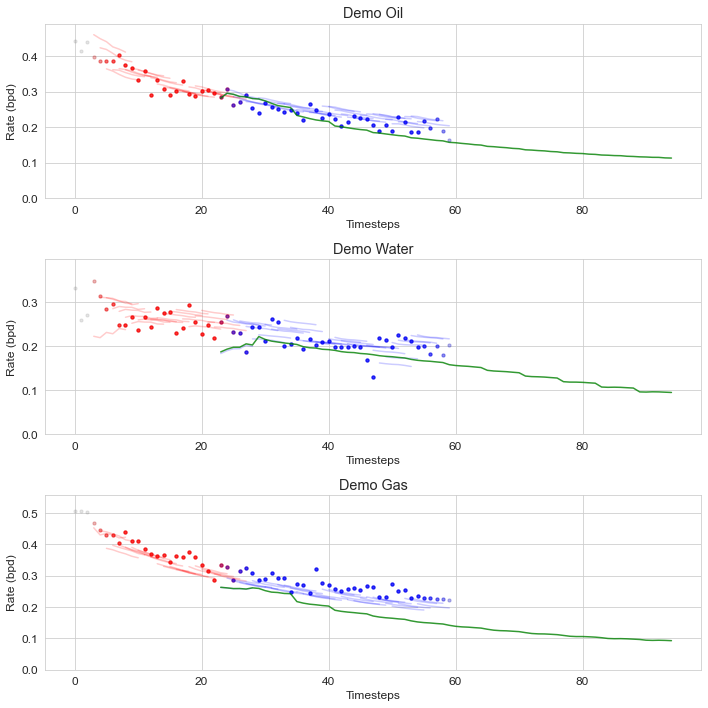

In [5]:
#for the same well, compare train and test periods
plot = plotter.Plotter(n_samples, n_lag, n_seq, y_train, y_test, Bakken.y_noisy, forecasts_train, forecasts_test, forecasts_test_multi)
plot.plot_profiles_nontransfer(ref_case=6, name='Demo ')